In [24]:
import stable_baselines3 

In [17]:
# Add this to the second cell in your notebook
import sys
from pathlib import Path

# Add project root to sys.path if needed
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import your environment
from src.envs import NoThreeCollinearEnv, Point
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env
import numpy as np

# Create environment
env = NoThreeCollinearEnv(m=30, n=30)

# Check if environment is compatible with Stable Baselines3
print("Checking environment compatibility...")
check_env(env, warn=True)
print("Environment check passed!")

# Create and train DQN model
model = DQN("MlpPolicy", env, verbose=1, learning_rate=0.0001)

# Train the model
print("Training model...")
model.learn(total_timesteps=100000)
'''

# Test the trained model
print("Testing trained model...")
obs, info = env.reset()
for i in range(10):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    print(f"Step {i+1}: Action={action}, Reward={reward}, Done={done}")
    if done:
        obs, info = env.reset()
        print("Episode finished, resetting environment")
'''

Checking environment compatibility...
Environment check passed!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Training model...
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 7.5      |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 12276    |
|    time_elapsed     | 0        |
|    total_timesteps  | 44       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.12     |
|    ep_rew_mean      | 6.88     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 13243    |
|    time_elapsed     | 0        |
|    total_timesteps  | 73       |
----------------------------------
----------------------------------
| rollout/         

/Users/zxmath/Library/Caches/pypoetry/virtualenvs/rlmath-Az9PUh0y-py3.12/lib/python3.12/site-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.22GB > 3.09GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 9.36     |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 1641     |
|    time_elapsed     | 0        |
|    total_timesteps  | 300      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.647    |
|    n_updates        | 49       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 9.31     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 1662     |
|    time_elapsed     | 0        |
|    total_timesteps  | 340      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.665    |
|    n_updates      

'\n\n# Test the trained model\nprint("Testing trained model...")\nobs, info = env.reset()\nfor i in range(10):\n    action, _states = model.predict(obs, deterministic=True)\n    obs, reward, done, truncated, info = env.step(action)\n    print(f"Step {i+1}: Action={action}, Reward={reward}, Done={done}")\n    if done:\n        obs, info = env.reset()\n        print("Episode finished, resetting environment")\n'

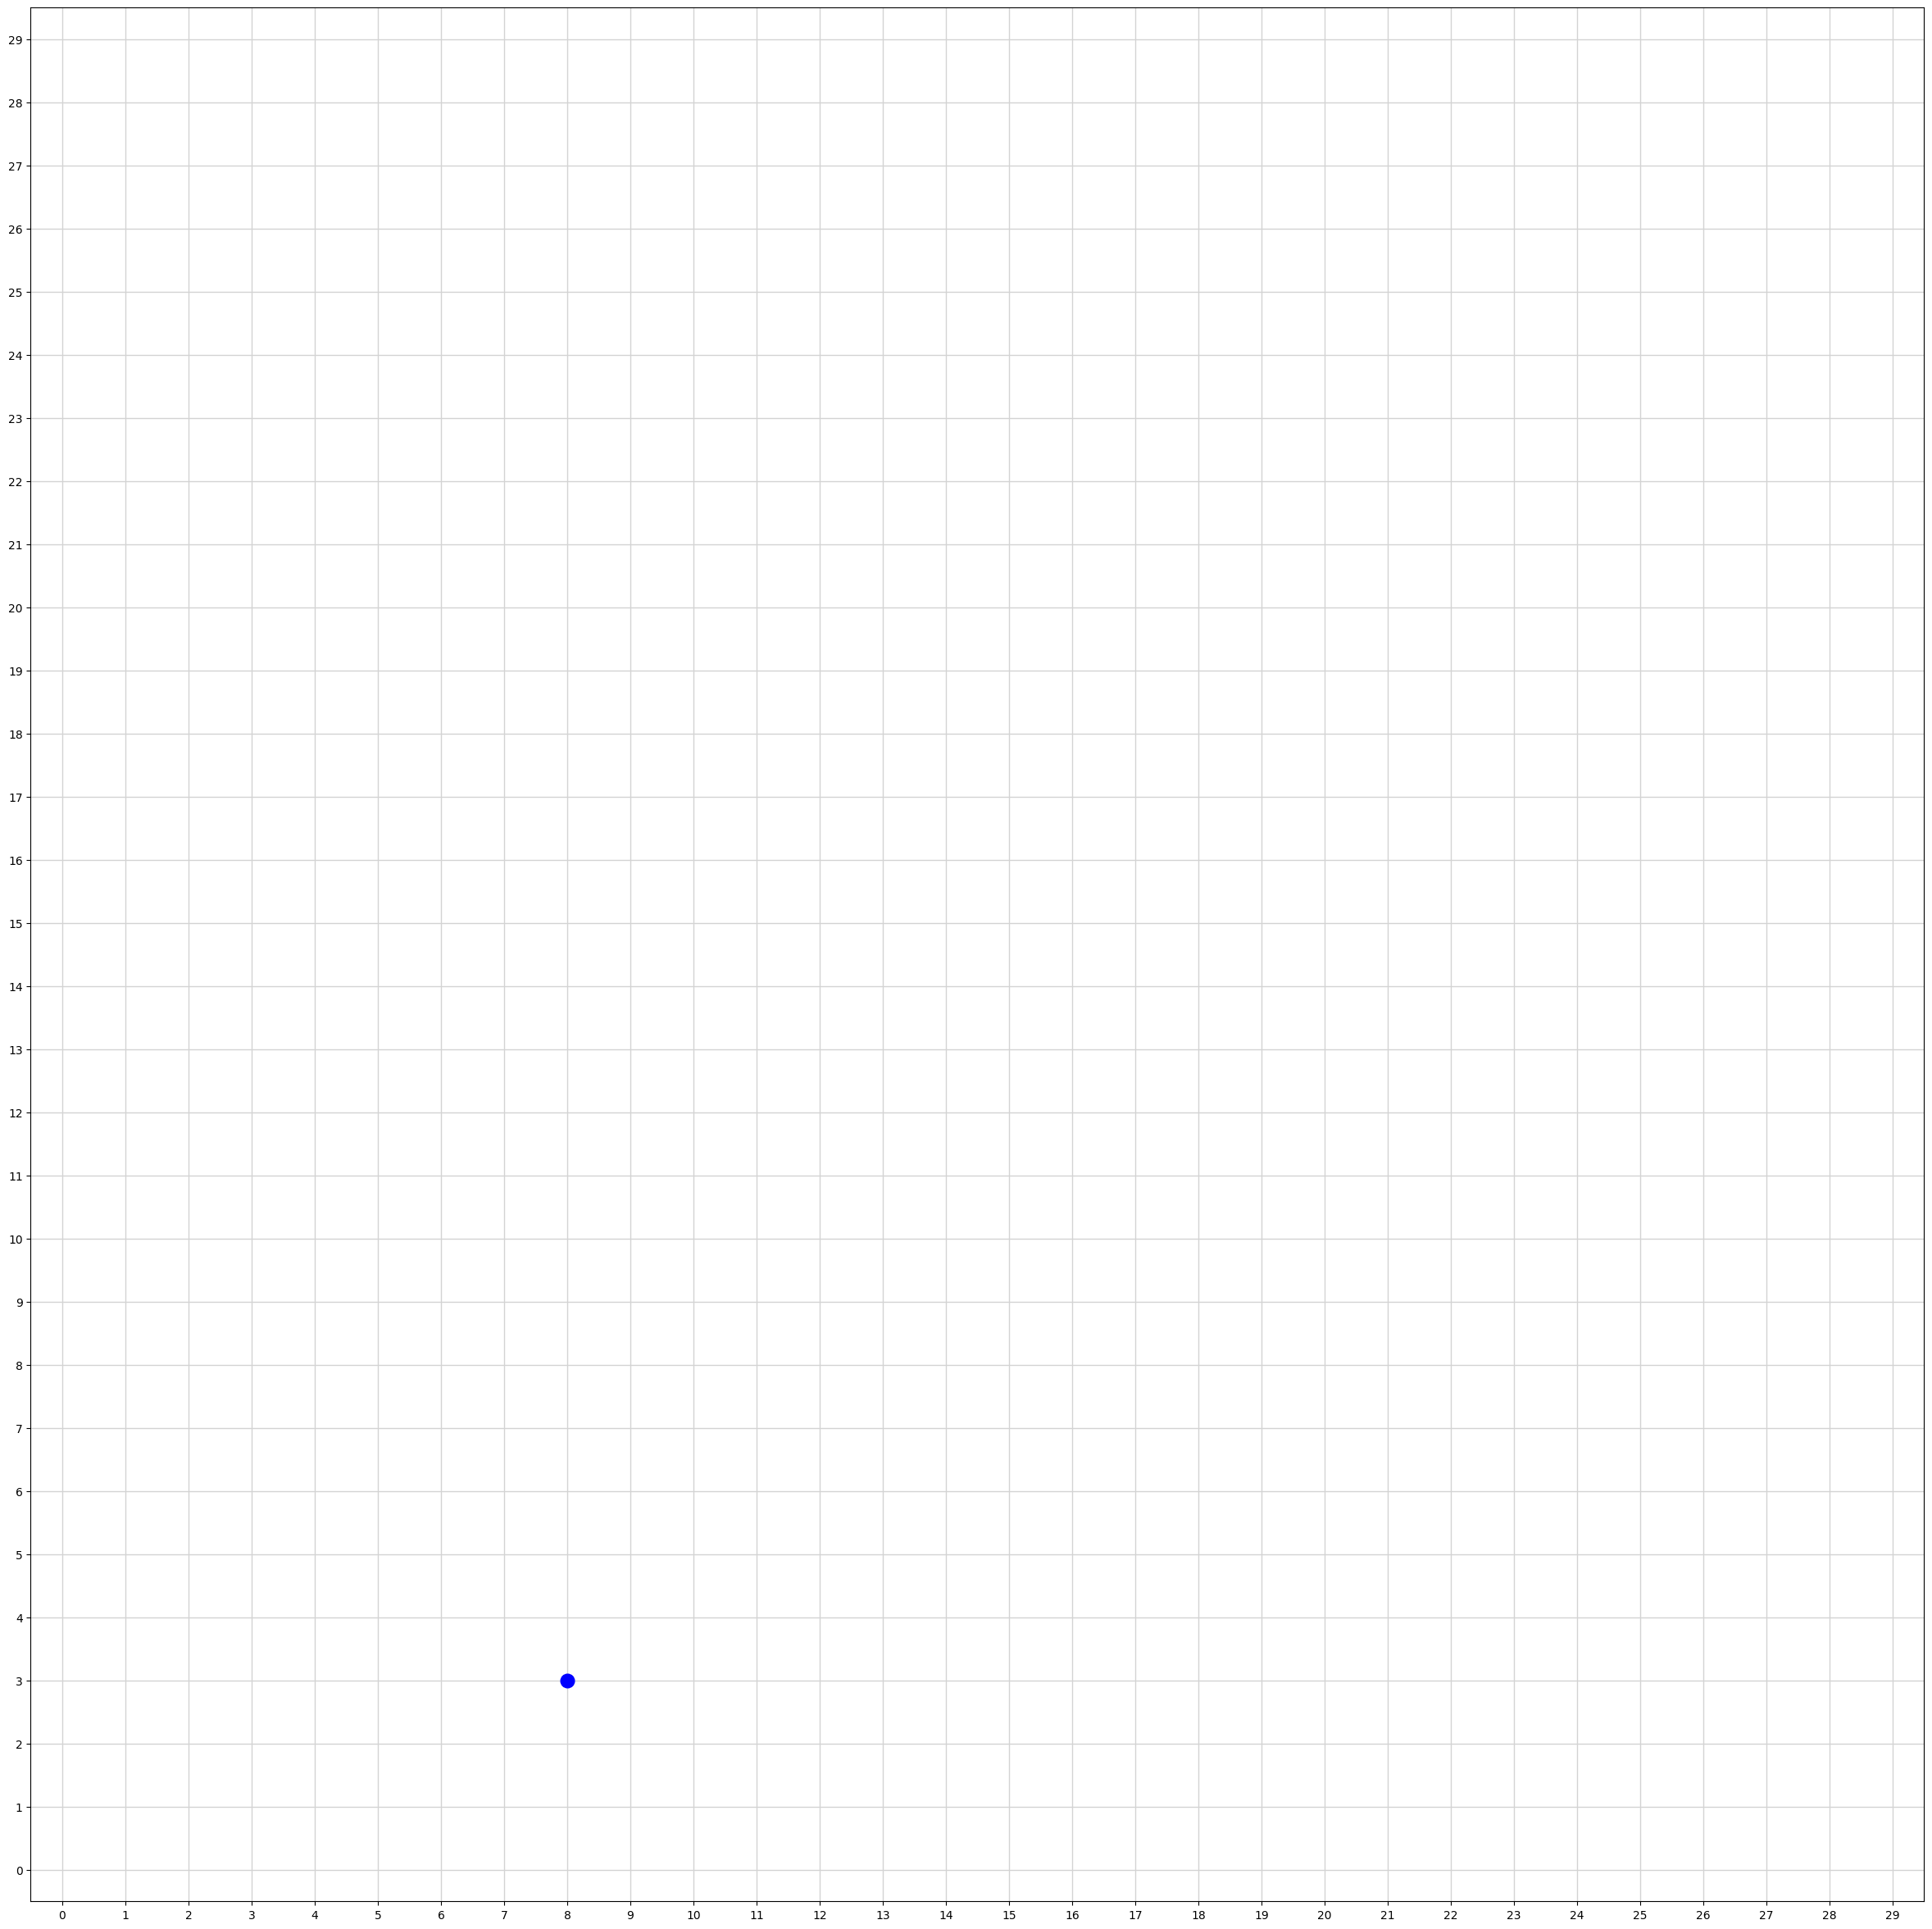

Game ended after 2 steps with reward -10


In [18]:
# Simple final state visualization
def show_final_state(model, env):
    obs, info = env.reset()
    done = False
    step = 0
    
    while not done and step < 1000:  # Limit steps to avoid infinite loop
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        step += 1
    
    env.plot()  # Use the existing plot method
    print(f"Game ended after {step} steps with reward {reward}")

# Show final state
show_final_state(model, env)

In [26]:
# Replace DQN with PPO
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import sys
from pathlib import Path

# Add project root to sys.path if needed
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import your environment
from src.envs import NoThreeCollinearEnv, Point
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env
import numpy as np

# Create environment (PPO works better with vectorized environments)
env = NoThreeCollinearEnv(m=10, n=10)  # Start with smaller grid for faster training

# Check if environment is compatible with Stable Baselines3
print("Checking environment compatibility...")
check_env(env, warn=True)
print("Environment check passed!")

# Create vectorized environment for PPO
vec_env = make_vec_env(lambda: NoThreeCollinearEnv(m=20, n=20), n_envs=4)

# Create and train PPO model
model = PPO(
    "MlpPolicy", 
    vec_env, 
    verbose=1, 
    learning_rate=0.0003,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2
)

# Train the model
print("Training PPO model...")
model.learn(total_timesteps=200000)

# Save the model
model.save("ppo_collinear_model")
print("Model saved!")

Checking environment compatibility...
Environment check passed!
Using cpu device
Training PPO model...
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8.92     |
|    ep_rew_mean     | 7.02     |
| time/              |          |
|    fps             | 15714    |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 8.62        |
|    ep_rew_mean          | 6.92        |
| time/                   |             |
|    fps                  | 6201        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.012676643 |
|    clip_fraction        | 0.0917      |
|    clip_range           | 0.2         |
|    entrop

Testing PPO model...
Step 1: Action=178 -> Point(8, 18), Reward=1
Step 2: Action=7 -> Point(0, 7), Reward=1
Step 3: Action=319 -> Point(15, 19), Reward=1
Step 4: Action=62 -> Point(3, 2), Reward=1
Step 5: Action=383 -> Point(19, 3), Reward=1
Step 6: Action=275 -> Point(13, 15), Reward=1
Step 7: Action=116 -> Point(5, 16), Reward=1
Step 8: Action=384 -> Point(19, 4), Reward=1
Step 9: Action=140 -> Point(7, 0), Reward=1
Step 10: Action=180 -> Point(9, 0), Reward=1
Step 11: Action=383 -> Point(19, 3), Reward=-10
Episode finished after 11 steps
Total reward: 0


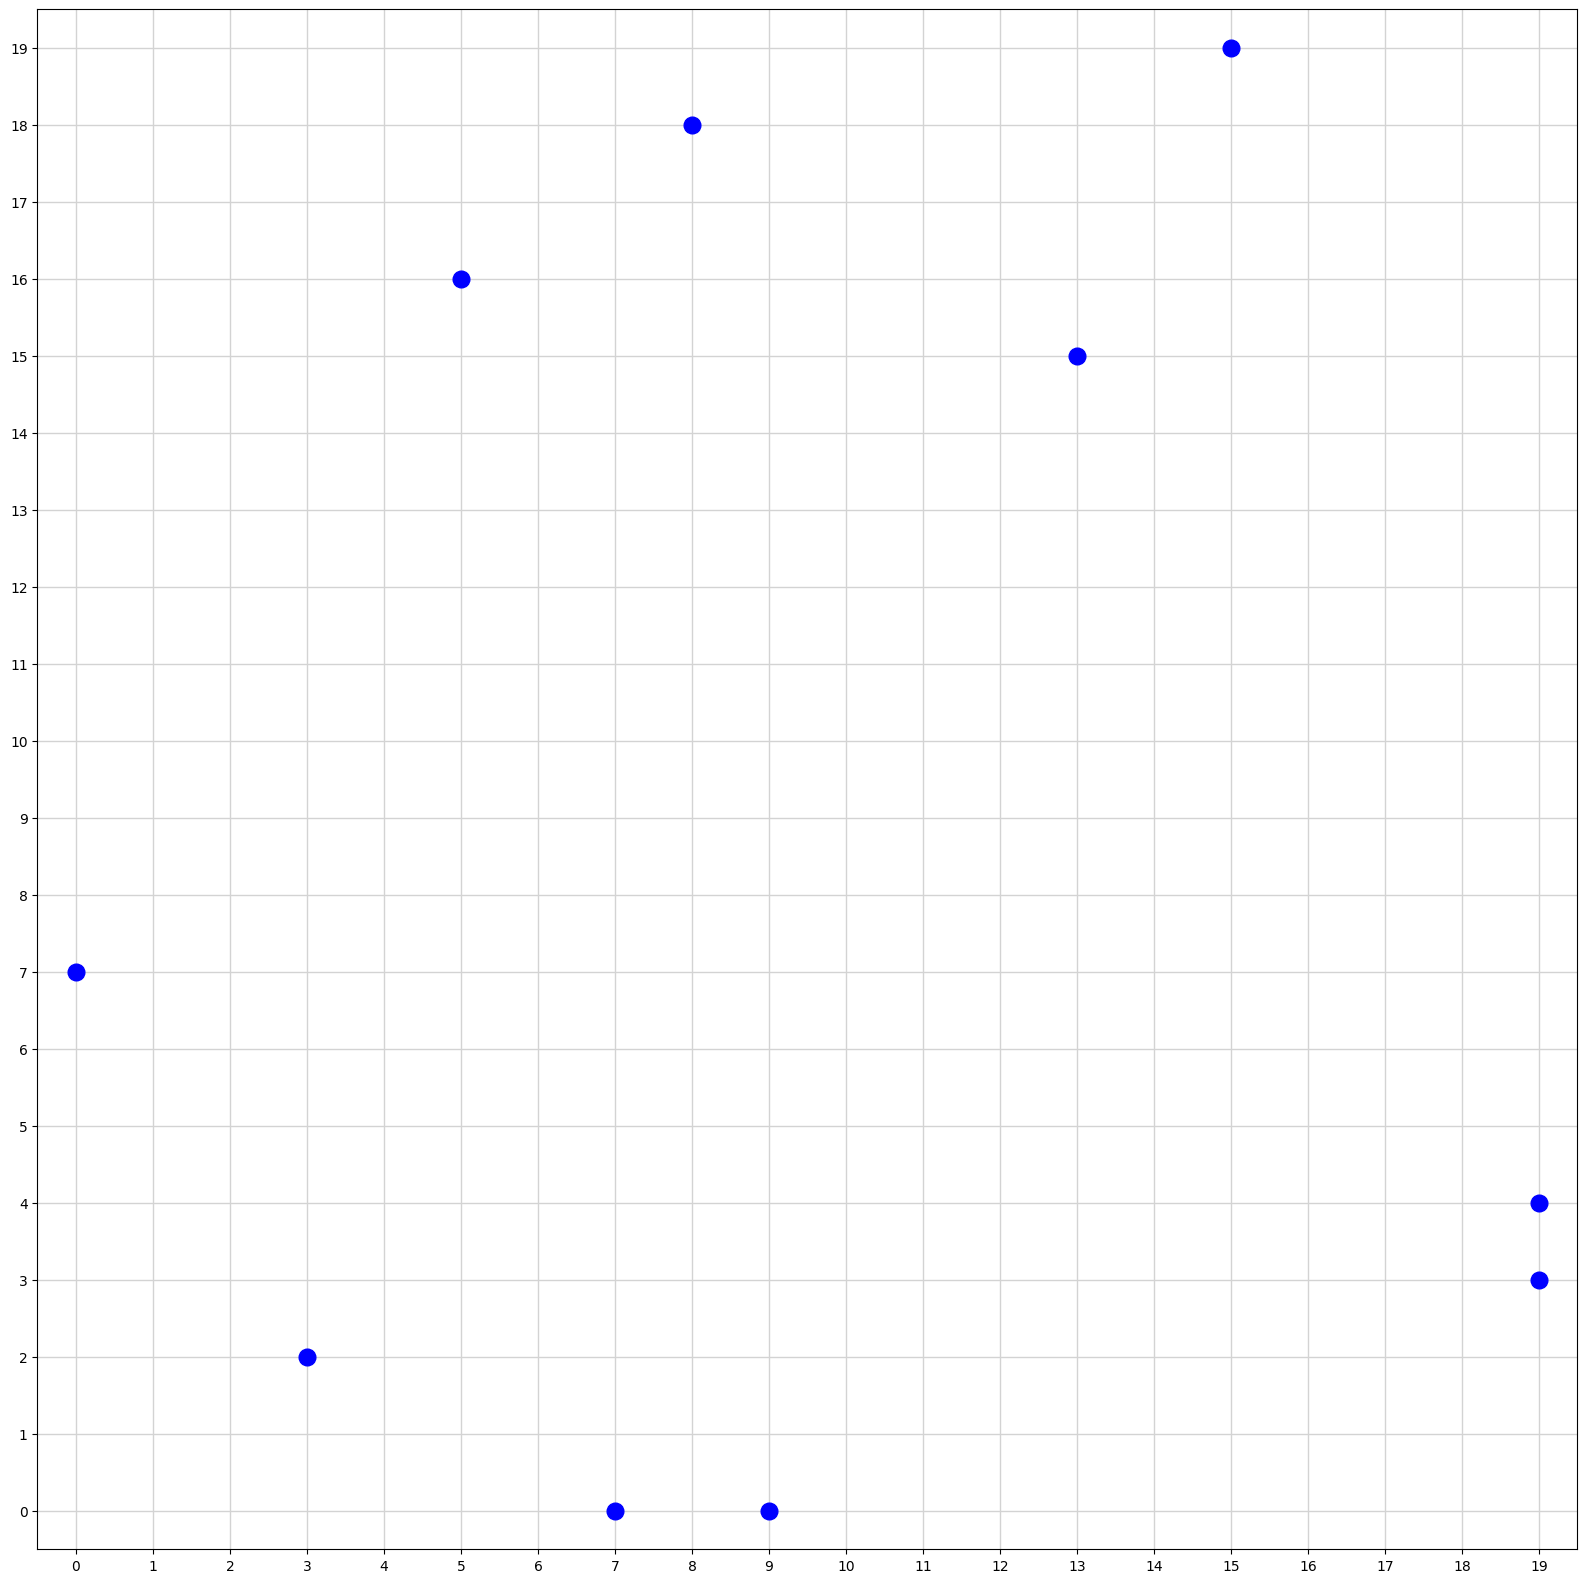

In [27]:
# Test the trained PPO model
def test_ppo_model(model, grid_size=(20, 20)):
    # Create single environment for testing
    test_env = NoThreeCollinearEnv(m=grid_size[0], n=grid_size[1])
    
    obs, info = test_env.reset()
    done = False
    step = 0
    total_reward = 0
    
    print("Testing PPO model...")
    while not done and step < 1000:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = test_env.step(action)
        total_reward += reward
        step += 1
        
        point = test_env.decode_action(action)
        print(f"Step {step}: Action={action} -> Point({point.x}, {point.y}), Reward={reward}")
        
        if done:
            print(f"Episode finished after {step} steps")
            print(f"Total reward: {total_reward}")
            break
    
    # Show final state
    test_env.plot()
    return test_env, step, total_reward

# Test the model
test_env, steps, reward = test_ppo_model(model)

Checking environment compatibility for A2C...
Environment check passed!
Using cpu device
Training A2C model...
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.48     |
|    ep_rew_mean        | 3.88     |
| time/                 |          |
|    fps                | 20169    |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 4000     |
| train/                |          |
|    entropy_loss       | -4.6     |
|    explained_variance | -0.0234  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 2.98     |
|    value_loss         | 3.1      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.59     |
|    ep_rew_mean        | 3.89     |
| time/                 |          |
|    fps                | 21164    |
|    iterations         | 200      |
|

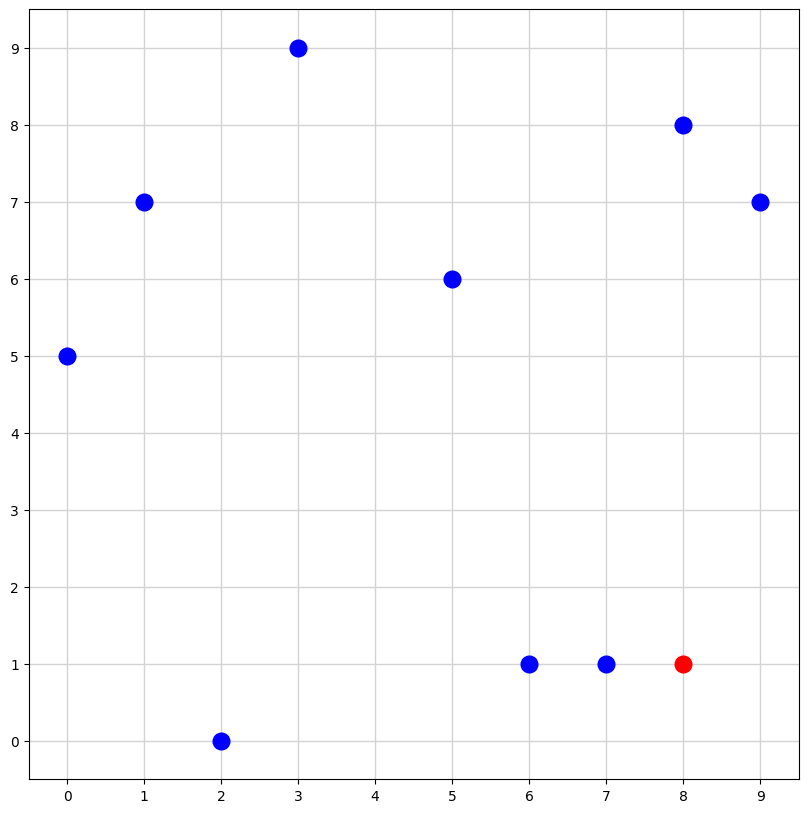

In [33]:
# Try A2C (Advantage Actor-Critic)
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

# Create environment for A2C
env = NoThreeCollinearEnv(m=10, n=10)  # Start with smaller grid

# Check environment compatibility
print("Checking environment compatibility for A2C...")
check_env(env, warn=True)
print("Environment check passed!")

# Create vectorized environment for A2C (works well with multiple envs)
vec_env = make_vec_env(lambda: NoThreeCollinearEnv(m=10, n=10), n_envs=8)

# Create and train A2C model
a2c_model = A2C(
    "MlpPolicy", 
    vec_env, 
    verbose=1, 
    learning_rate=0.0007,
    n_steps=5,  # A2C typically uses fewer steps
    gamma=0.99,
    gae_lambda=1.0,  # A2C often uses lambda=1.0
    ent_coef=0.01,  # Entropy coefficient for exploration
    vf_coef=0.25,   # Value function coefficient
    max_grad_norm=0.5
)

# Train the A2C model
print("Training A2C model...")
a2c_model.learn(total_timesteps=100000)

# Save the model
a2c_model.save("a2c_collinear_model")
print("A2C model saved!")

# Test the A2C model
def test_a2c_model(model, grid_size=(10, 10)):
    test_env = NoThreeCollinearEnv(m=grid_size[0], n=grid_size[1])
    
    obs, info = test_env.reset()
    done = False
    step = 0
    total_reward = 0
    
    print("Testing A2C model...")
    while not done and step < 50:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = test_env.step(action)
        total_reward += reward
        step += 1
        
        point = test_env.decode_action(action)
        print(f"Step {step}: Action={action} -> Point({point.x}, {point.y}), Reward={reward}")
        
        if done:
            print(f"Episode finished after {step} steps")
            print(f"Total reward: {total_reward}")
            break
    
    test_env.plot()
    return test_env, step, total_reward

# Test the A2C model
test_env_a2c, steps_a2c, reward_a2c = test_a2c_model(a2c_model)